In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

In [400]:
PATH = '../'
df = pd.read_csv(PATH + 'data/clean_data.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Organize and normalise data

In [401]:
X = df.drop('diagnosis', axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)

In [402]:
y = df['diagnosis']

# Create training and testing set

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Train and test the model

In [404]:
LR = LogisticRegression(C=0.1, solver='liblinear', penalty='l2', random_state=4)
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=4, solver='liblinear')

In [405]:
predictions = LR.predict(X_test)
prediction_proba = LR.predict_proba(X_test)

In [406]:
accuracy_score = metrics.accuracy_score(y_test, predictions)
accuracy_score

0.9912280701754386

Text(50.722222222222214, 0.5, 'Real')

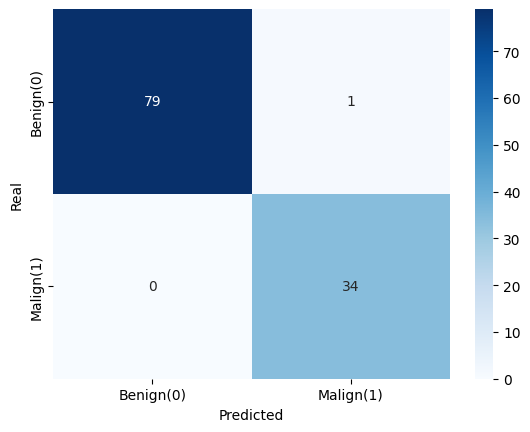

In [407]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
class_labels = ['Benign(0)', 'Malign(1)']
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Real')

# Save the model

In [408]:
with open(PATH + 'models/logistic_regression.pkl', 'wb') as model_file:
    pickle.dump(LR, model_file)